> # <span style="font-family: JetBrains Mono; color:SteelBlue">IMPORT</span>

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import yfinance as yfin
yfin.pdr_override()
plt.style.use('fivethirtyeight')

> # <span style="font-family: JetBrains Mono; color:SteelBlue">IDO</span>

In [2]:
end = dt.datetime.now()
start = end - dt.timedelta(days=5000)

> # <span style="font-family: JetBrains Mono; color: SteelBlue">RESZVENYEK</span>

In [3]:
#Pfizer - PFE (Egeszsegugy)
#Oracle - ORCL (Informatika)
#NextEra Energy - NEE (Megujulo energia)
#Financial Select Sector SPDR Fund - XLF (Penzugy)
#Honeywell International Inc - HON (Ipar)
#SPY - S&P 500 ETF

assets = ['PFE', 'ORCL', 'NEE', 'XLF', 'HON','SPY']

dataframe = pd.DataFrame()

for stock in assets:
    dataframe[stock] = web.DataReader(stock, data_source='yahoo', start=start, end=end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


> # <span style="font-family: JetBrains Mono; color: SteelBlue">VIZUALIZALAS</span>

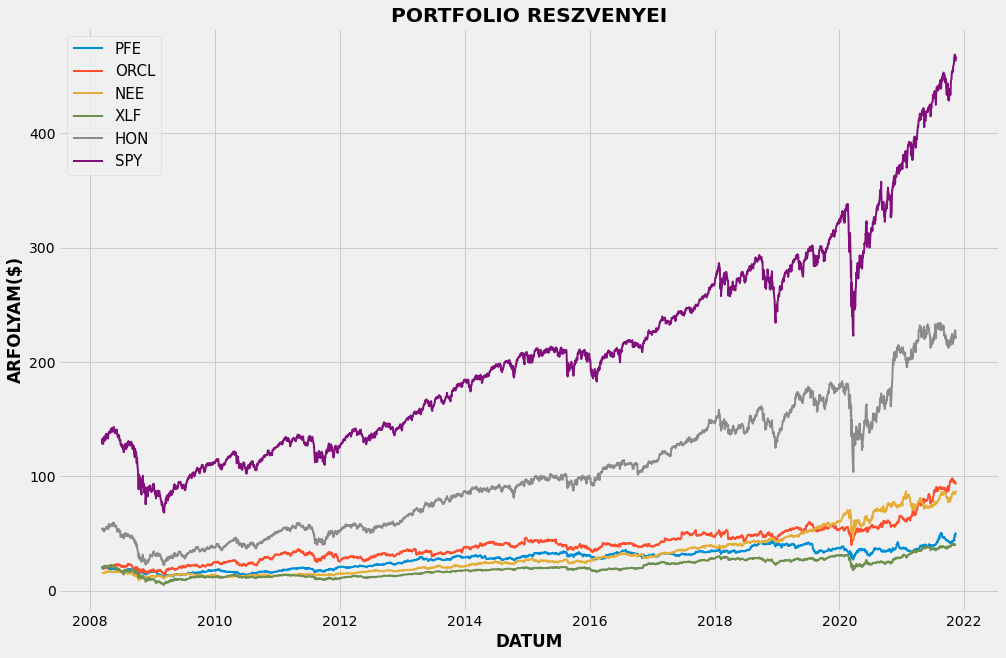

In [4]:
plt.figure(figsize=(15,10))

for t in dataframe.columns.values:
    plt.plot(dataframe[t], label = t, lw=2)
    plt.title('PORTFOLIO RESZVENYEI', fontweight='bold')

plt.xlabel('DATUM', fontweight='bold')
plt.ylabel('ARFOLYAM($)', fontweight='bold')
plt.legend(fontsize=15)
plt.show()

> # <span style="font-family: JetBrains Mono; color: SteelBlue">SZORAS</span>

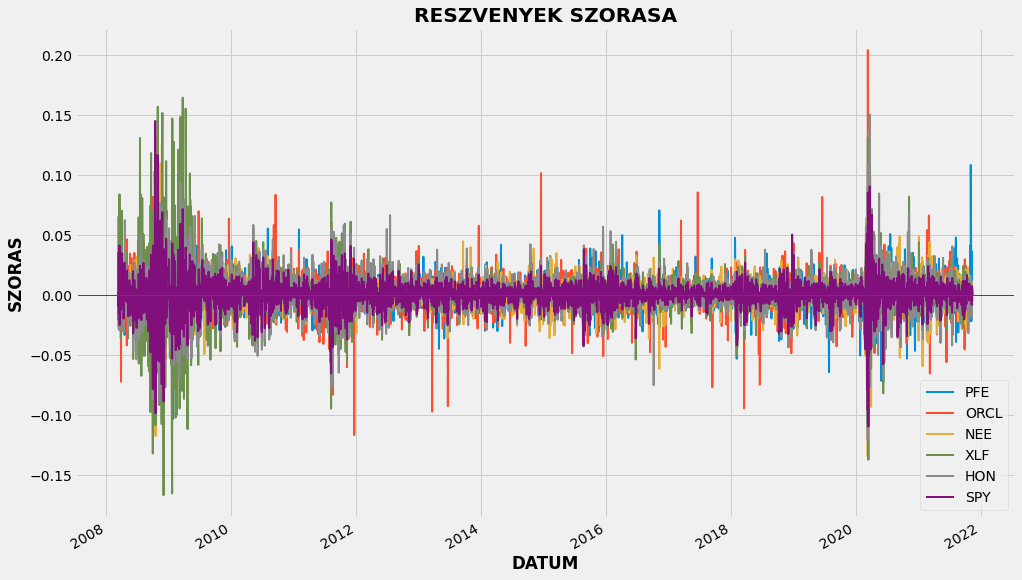

In [5]:
returns = dataframe.pct_change()
returns.plot(figsize=(15,10), lw=2)
plt.title('RESZVENYEK SZORASA', fontweight='bold')
plt.xlabel('DATUM', fontweight='bold')
plt.ylabel('SZORAS', fontweight='bold')
plt.axhline(0, color="red", lw=1)
plt.show()


> # <span style="font-family: JetBrains Mono; color: SteelBlue">KOVARIANCIA MATRIX</span>

In [6]:
# ~250 hetkoznap van egy evben
kov_matrix = returns.cov() * 250
print(kov_matrix)
print('-------------------------------------------------------')
print('PFE - ORCL: {:.2f}'.format(np.sqrt(kov_matrix.iloc[0,1])*100) + '%')
print('------------------')
print('PFE - NEE: {:.2f}'.format(np.sqrt(kov_matrix.iloc[0,2])*100) + '%')
print('------------------')
print('PFE - XLF: {:.2f}'.format(np.sqrt(kov_matrix.iloc[0,3])*100) + '%')
print('------------------')
print('PFE - HON: {:.2f}'.format(np.sqrt(kov_matrix.iloc[0,4])*100) +'%')
print('------------------')
print('ORCL - NEE: {:.2f}'.format(np.sqrt(kov_matrix.iloc[1,2])*100) + '%')
print('------------------')
print('ORCL - XLF: {:.2f}'.format(np.sqrt(kov_matrix.iloc[1,3])*100) + '%')
print('------------------')
print('ORCL - HON: {:.2f}'.format(np.sqrt(kov_matrix.iloc[1,4])*100) + '%')
print('------------------')
print('NEE - XLF: {:.2f}'.format(np.sqrt(kov_matrix.iloc[2,3])*100) + '%')
print('------------------')
print('NEE - HON: {:.2f}'.format(np.sqrt(kov_matrix.iloc[2,4])*100) + '%')
print('------------------')
print('XLF - HON: {:.2f}'.format(np.sqrt(kov_matrix.iloc[3,4])*100) + '%')

           PFE      ORCL       NEE       XLF       HON       SPY
PFE   0.054874  0.030797  0.024266  0.041975  0.031935  0.030916
ORCL  0.030797  0.077845  0.028329  0.054329  0.044396  0.040595
NEE   0.024266  0.028329  0.055294  0.034264  0.031665  0.029503
XLF   0.041975  0.054329  0.034264  0.110580  0.064102  0.057919
HON   0.031935  0.044396  0.031665  0.064102  0.072331  0.044877
SPY   0.030916  0.040595  0.029503  0.057919  0.044877  0.041915
-------------------------------------------------------
PFE - ORCL: 17.55%
------------------
PFE - NEE: 15.58%
------------------
PFE - XLF: 20.49%
------------------
PFE - HON: 17.87%
------------------
ORCL - NEE: 16.83%
------------------
ORCL - XLF: 23.31%
------------------
ORCL - HON: 21.07%
------------------
NEE - XLF: 18.51%
------------------
NEE - HON: 17.79%
------------------
XLF - HON: 25.32%


> # <span style="font-family: JetBrains Mono; color: SteelBlue">KORRELACIOS MATRIX, R<sup>2</sup></span>

In [7]:
korr_matrix = returns.corr()
korr_matrix
r_negyzet = korr_matrix.iloc[:]**2
print('Korrelacios matrix:')
print(korr_matrix)
print('------------------------------------------------------')
print('R-negyzet:')
print(r_negyzet)

Korrelacios matrix:
           PFE      ORCL       NEE       XLF       HON       SPY
PFE   1.000000  0.471205  0.440519  0.538848  0.506900  0.644640
ORCL  0.471205  1.000000  0.431797  0.585573  0.591644  0.710684
NEE   0.440519  0.431797  1.000000  0.438181  0.500700  0.612825
XLF   0.538848  0.585573  0.438181  1.000000  0.716757  0.850736
HON   0.506900  0.591644  0.500700  0.716757  1.000000  0.815034
SPY   0.644640  0.710684  0.612825  0.850736  0.815034  1.000000
------------------------------------------------------
R-negyzet:
           PFE      ORCL       NEE       XLF       HON       SPY
PFE   1.000000  0.222034  0.194057  0.290357  0.256947  0.415561
ORCL  0.222034  1.000000  0.186449  0.342895  0.350043  0.505072
NEE   0.194057  0.186449  1.000000  0.192003  0.250701  0.375554
XLF   0.290357  0.342895  0.192003  1.000000  0.513740  0.723752
HON   0.256947  0.350043  0.250701  0.513740  1.000000  0.664281
SPY   0.415561  0.505072  0.375554  0.723752  0.664281  1.000000


> # <span style="font-family: JetBrains Mono; color: SteelBlue">HA CSAK...</span>

In [8]:
#Pfizer-be:
pfe_ret = np.sum(returns.loc[:, 'PFE'].mean()*250)*100
pfe_vol = np.sqrt(kov_matrix.iloc[0,0])*100
print('A PFE hozama: {:.2f}'.format(pfe_ret)+'%')
print('A PFE szorasa: {:.2f}'.format(pfe_vol)+'%')

print('-----------------------')

#Oracle-be:
orcl_ret = np.sum(returns.loc[:, 'ORCL'].mean()*250)*100
orcl_vol = np.sqrt(kov_matrix.iloc[1,1])*100
print('Az ORCL hozama: {:.2f}'.format(orcl_ret)+'%')
print('Az ORCL szorasa: {:.2f}'.format(orcl_vol)+'%')

print('-----------------------')

#NextEra Energy-be:
nee_ret = np.sum(returns.loc[:, 'NEE'].mean()*250)*100
nee_vol = np.sqrt(kov_matrix.iloc[2,2])*100
print('A NEE hozama: {:.2f}'.format(nee_ret)+'%')
print('A NEE szorasa: {:.2f}'.format(nee_vol)+'%')

print('-----------------------')

#Financial Select Sector SPDR Fund-ba:
xlf_ret = np.sum(returns.loc[:, 'XLF'].mean()*250)*100
xlf_vol = np.sqrt(kov_matrix.iloc[3,3])*100
print('Az XLF hozama: {:.2f}'.format(xlf_ret)+'%')
print('Az XLF szorasa: {:.2f}'.format(xlf_vol)+'%')

print('-----------------------')

#Honeywell International-ba:
hon_ret = np.sum(returns.loc[:, 'HON'].mean()*250)*100
hon_vol = np.sqrt(kov_matrix.iloc[4,4])*100
print('A HON hozama: {:.2f}'.format(hon_ret)+'%')
print('A HON szorasa: {:.2f}'.format(hon_vol)+'%')

print('-----------------------')

#SPY-ba:
spy_ret = np.sum(returns.loc[:, 'SPY'].mean()*250)*100
spy_vol = np.sqrt(kov_matrix.iloc[5,5])*100
print('A SPY hozama: {:.2f}'.format(spy_ret)+'%')
print('A SPY szorasa: {:.2f}'.format(spy_vol)+'%')

A PFE hozama: 9.31%
A PFE szorasa: 23.43%
-----------------------
Az ORCL hozama: 15.37%
Az ORCL szorasa: 27.90%
-----------------------
A NEE hozama: 15.56%
A NEE szorasa: 23.51%
-----------------------
Az XLF hozama: 10.87%
Az XLF szorasa: 33.25%
-----------------------
A HON hozama: 14.01%
A HON szorasa: 26.89%
-----------------------
A SPY hozama: 11.49%
A SPY szorasa: 20.47%


> # <span style="font-family: JetBrains Mono; color: SteelBlue">PORTFOLIO HOZAM, SZORAS, SHARPE-MUTATO</span>

Hozam: 14.66 %
Szoras: 20.34 %
Sharpe: 0.72
Sulyok: [0.07  0.188 0.588 0.013 0.082 0.058]
---------------------------------------------
PFE: 0.07
ORCL: 0.1882
NEE: 0.5884
XLF: 0.013
HON: 0.0823
SPY: 0.05816


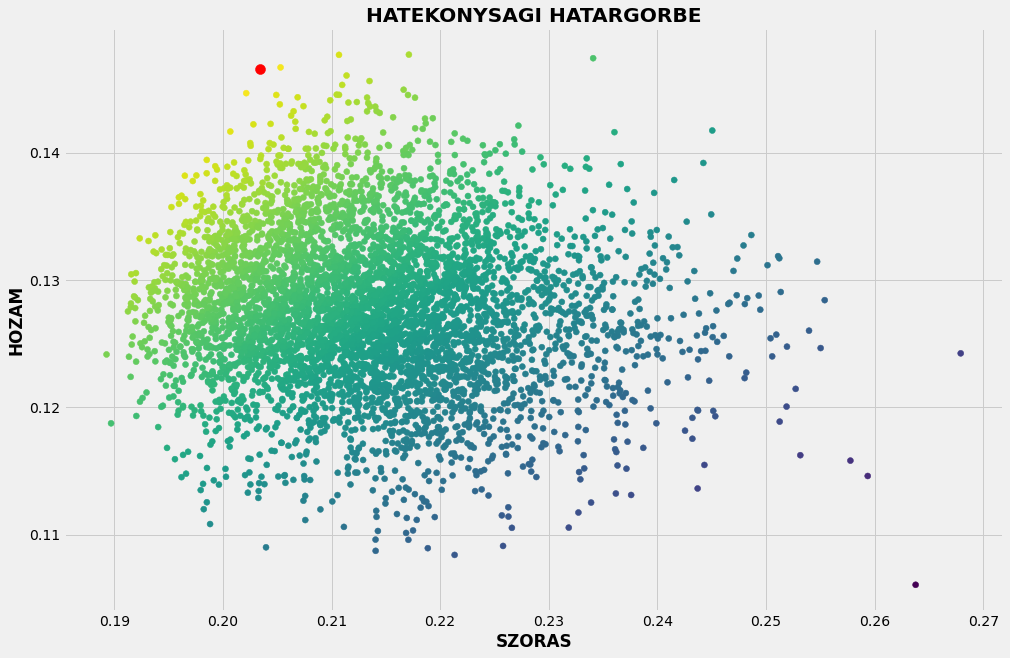

In [9]:
#Sulyok
weights = np.random.random(len(dataframe.columns)) 
weights /= weights.sum()

#Variancia
port_variance = np.dot(weights.T, np.dot(kov_matrix, weights))

#Szoras
port_volatility = np.sqrt(port_variance)

#Hozam
port_return = np.sum(returns.mean() * weights * 250)

hanyszor = 5000
portfolio_weights = np.zeros((hanyszor, len(dataframe.columns)))
portfolio_return = np.zeros(hanyszor)
portfolio_vol = np.zeros(hanyszor)
portfolio_sharpe = np.zeros(hanyszor)

for i in range(hanyszor):
    weights = np.random.random(len(dataframe.columns))
    weights /= weights.sum()
    portfolio_weights[i] = weights
    portfolio_return[i] = np.sum(returns.mean() * weights * 250)
    portfolio_vol[i] = np.sqrt(np.dot(weights.T, np.dot(kov_matrix, weights)))
    portfolio_sharpe[i] = (portfolio_return[i] / portfolio_vol[i])
    

plt.figure(figsize=(15,10))
plt.scatter(portfolio_vol,portfolio_return, c=portfolio_sharpe)
plt.scatter(portfolio_vol[portfolio_sharpe.argmax()],
            portfolio_return[portfolio_sharpe.argmax()], c='red',s=100)

plt.title('HATEKONYSAGI HATARGORBE',fontweight='bold')
plt.xlabel('SZORAS',fontweight='bold')
plt.ylabel('HOZAM',fontweight='bold')

print('Hozam: {:.2f}'.format(portfolio_return[portfolio_sharpe.argmax()]*100),'%')
print('Szoras: {:.2f}'.format(portfolio_vol[portfolio_sharpe.argmax()]*100),'%')
print('Sharpe: {:.2f}'.format(portfolio_sharpe.max()))
print('Sulyok:', np.round(portfolio_weights[portfolio_sharpe.argmax()],3))
print('---------------------------------------------')

#for i in portfolio_weights[portfolio_sharpe.argmax()]:
 #   print(portfolio_weights[portfolio_sharpe.argmax(),[i]])
#for i in len(portfolio_weights[portfolio_sharpe.argmax()]):
#print(portfolio_weights[portfolio_sharpe.argmax(),[i]])
    
print('PFE:', np.round(portfolio_weights[portfolio_sharpe.argmax(),0],4))
print('ORCL:', np.round(portfolio_weights[portfolio_sharpe.argmax(),1],4))
print('NEE:', np.round(portfolio_weights[portfolio_sharpe.argmax(),2],4))
print('XLF:', np.round(portfolio_weights[portfolio_sharpe.argmax(),3],4))
print('HON:', np.round(portfolio_weights[portfolio_sharpe.argmax(),4],4))
print('SPY:', np.round(portfolio_weights[portfolio_sharpe.argmax(),5],5))

In [14]:
print("VOL (5000 day): ", round(spy_vol,2),"%")
print("RET: (5000 day) ", round(spy_ret,2),"%")

VOL (5000 day):  20.47 %
RET: (5000 day)  11.49 %


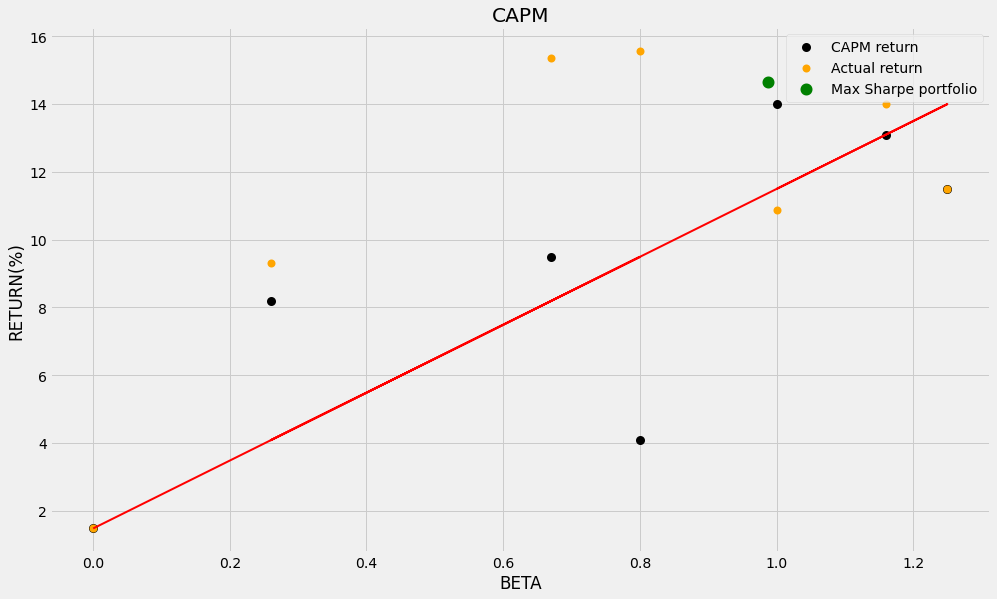

In [10]:
rf = 1.48

rf_beta = 0
pfe_beta = 0.67
orcl_beta = 0.8
nee_beta = 0.26
xlf_beta = 1.25
hon_beta = 1.16
spy_beta = 1

portfolio_beta = ((portfolio_vol[portfolio_sharpe.argmax()]**2))/kov_matrix.iloc[5,5]


betas = [rf_beta, pfe_beta, orcl_beta, nee_beta, xlf_beta, hon_beta, spy_beta]

capm_rf = rf
capm_pfe = rf + pfe_beta * (spy_ret - rf)
capm_orcl = rf + orcl_beta * (spy_ret - rf)
capm_nee = rf + nee_beta * (spy_ret - rf)
capm_xlf = rf + xlf_beta * (spy_ret - rf)
capm_hon = rf + hon_beta * (spy_ret - rf)
capm_spy = rf + spy_beta * (spy_ret - rf)

capms = [capm_rf, capm_pfe, capm_orcl, capm_nee, capm_xlf, capm_hon, capm_spy]

rets = [rf, pfe_ret, orcl_ret, nee_ret, xlf_ret, hon_ret, spy_ret]

#pfe_alpha = pfe_ret - capm_pfe
#orcl_alpha = orcl_ret - capm_orcl
#nee_alpha = nee_ret - capm_nee
#xlf_alpha = xlf_ret - capm_xlf
#hon_alpha = hon_ret - capm_hon
#spy_alpha = spy_ret - capm_spy

plt.figure(figsize=(15,9))
plt.scatter(x=sorted(betas), y=capms, c="black", lw=3, label="CAPM return")
plt.scatter(x=sorted(betas), y=rets, c="orange", lw=2, label="Actual return")
plt.scatter(x=portfolio_beta, y=portfolio_return[portfolio_sharpe.argmax()]*100, lw=6, c="green", label="Max Sharpe portfolio")

z = np.polyfit(betas, capms, 1)
p = np.poly1d(z)
plt.plot(betas, p(betas), c="r", lw=2)
plt.legend()
plt.title("CAPM")
plt.xlabel("BETA")
plt.ylabel("RETURN(%)")
plt.show()

> # <span style="font-family: JetBrains Mono; color: SteelBlue">MONTE CARLO-MODSZER(Arakra)</span>

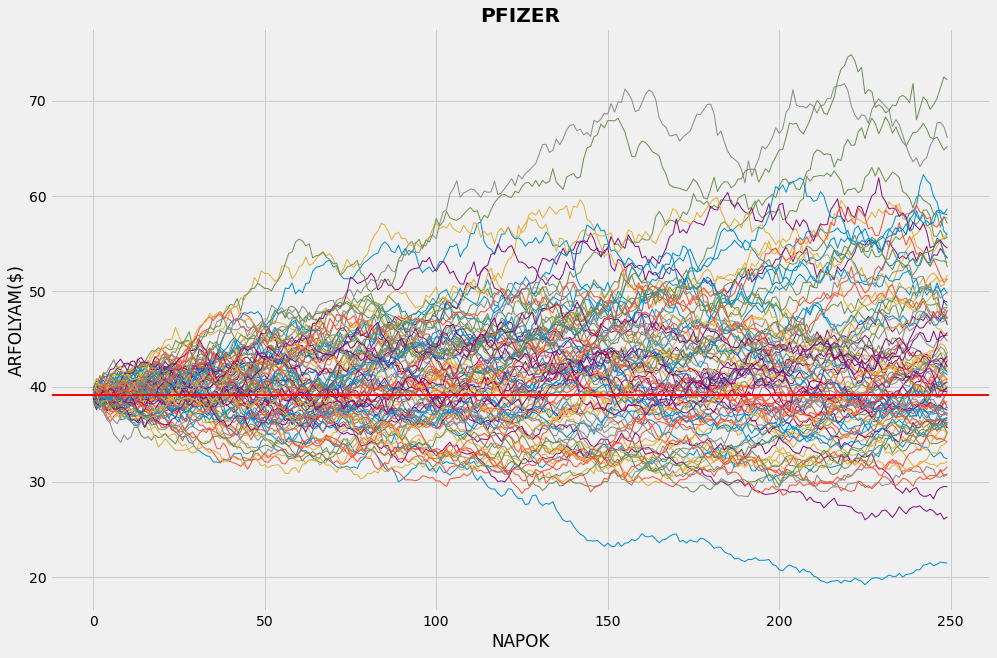

In [11]:
#Pfizer:
n = 100
days = 250 #1 ev

pfe_mu = returns['PFE'].mean()
pfe_sigma = returns['PFE'].std()

pfe_last_price = dataframe['PFE'].iloc[-1]
pfe_sim_returns = np.random.normal(pfe_mu, pfe_sigma, days)
pfe_sim_prices = pfe_last_price * (pfe_sim_returns + 1).cumprod()
plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("PFIZER", fontweight='bold')

for i in range(n):
    pfe_sim_returns = np.random.normal(pfe_mu, pfe_sigma, days)
    pfe_sim_prices = pfe_last_price * (pfe_sim_returns + 1).cumprod()
    plt.axhline(pfe_last_price, color="red", lw=2)
    plt.plot(pfe_sim_prices, lw=1)
    
plt.show()

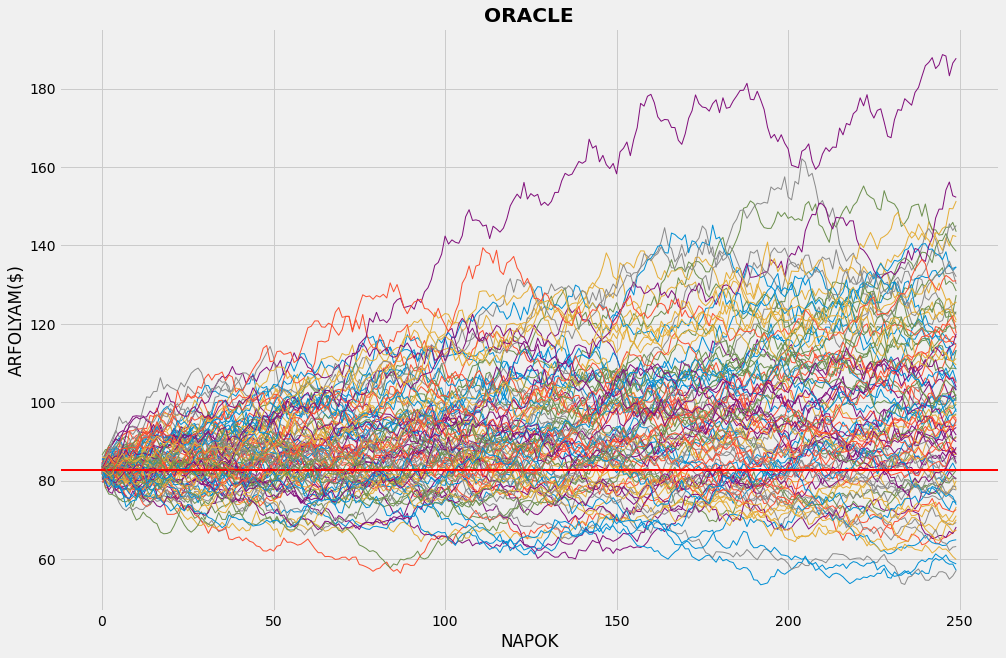

In [12]:
#Oracle:
n = 100
days = 250 #1 ev

orcl_mu = returns['ORCL'].mean()
orcl_sigma = returns['ORCL'].std()

orcl_last_price = dataframe['ORCL'].iloc[-1]
orcl_sim_returns = np.random.normal(orcl_mu, orcl_sigma, days)
orcl_sim_prices = orcl_last_price * (orcl_sim_returns + 1).cumprod()

plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("ORACLE", fontweight='bold')

for i in range(n):
    orcl_sim_returns = np.random.normal(orcl_mu, orcl_sigma, days)
    orcl_sim_prices = orcl_last_price * (orcl_sim_returns + 1).cumprod()
    plt.axhline(orcl_last_price, color="red", lw=2)
    plt.plot(orcl_sim_prices, lw=1)
    
plt.show()

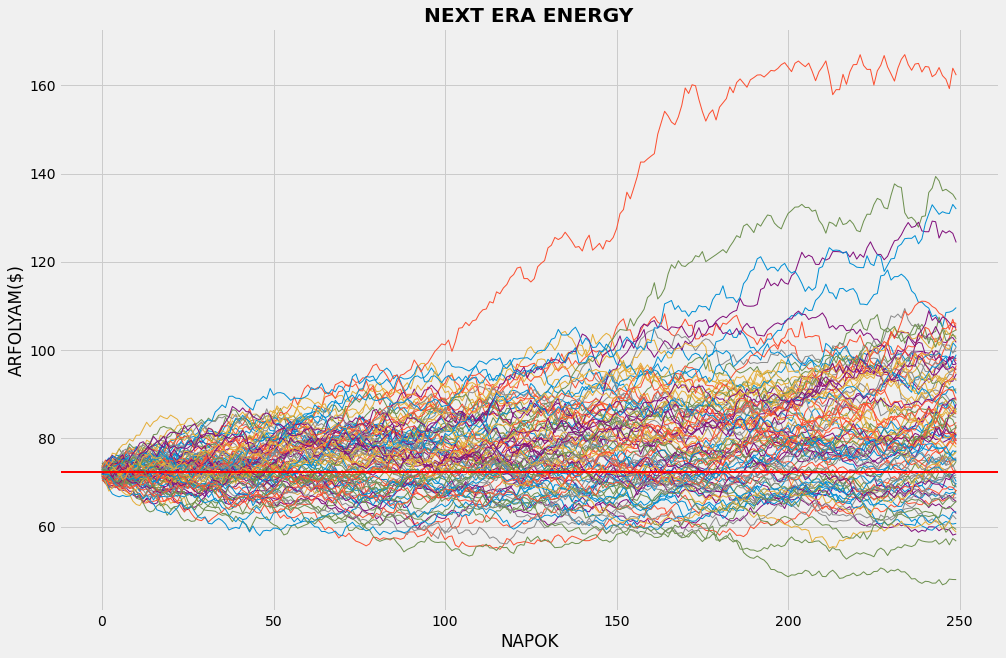

In [13]:
#Next Era Energy
n = 100
days = 250 #1 ev

nee_mu = returns['NEE'].mean()
nee_sigma = returns['NEE'].std()

nee_last_price = dataframe['NEE'].iloc[-1]

plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("NEXT ERA ENERGY", fontweight='bold')

for i in range(n):
    nee_sim_returns = np.random.normal(nee_mu, nee_sigma, days)
    nee_sim_prices = nee_last_price * (nee_sim_returns + 1).cumprod()
    plt.axhline(nee_last_price, color="red", lw=2)
    plt.plot(nee_sim_prices, lw=1)
    
plt.show()

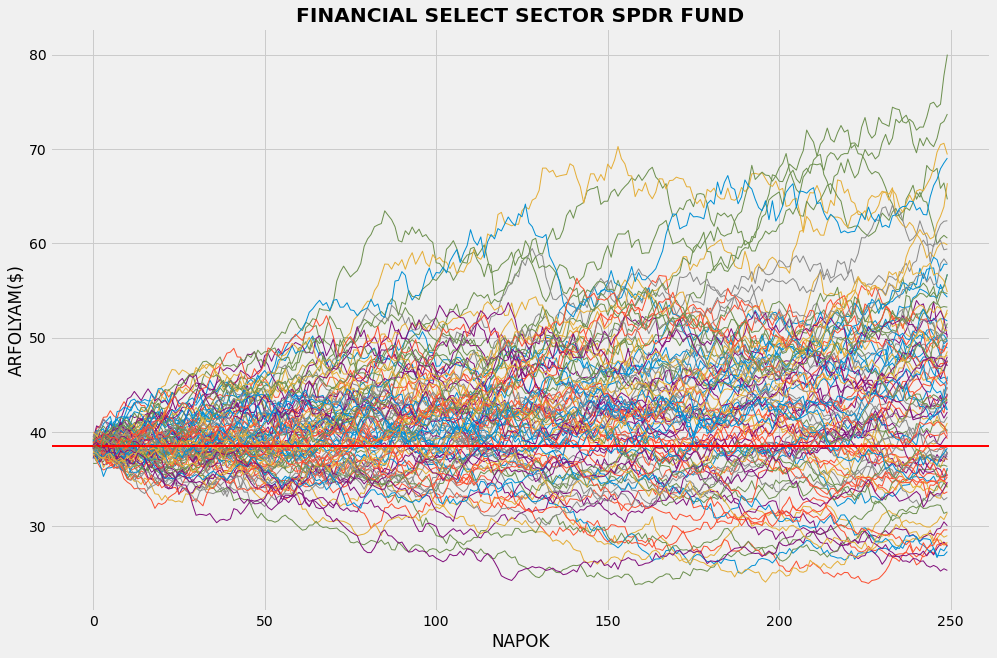

In [14]:
#Financial Select Sector SPDR Fund:
n = 100
days = 250 #1 ev

xlf_mu = returns['XLF'].mean()
xlf_sigma = returns['XLF'].std()

xlf_last_price = dataframe['XLF'].iloc[-1]

plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("FINANCIAL SELECT SECTOR SPDR FUND", fontweight='bold')

for i in range(n):
    xlf_sim_returns = np.random.normal(xlf_mu, xlf_sigma, days)
    xlf_sim_prices = xlf_last_price * (xlf_sim_returns + 1).cumprod()
    plt.axhline(xlf_last_price, color="red", lw=2)
    plt.plot(xlf_sim_prices, lw=1)
    
plt.show()

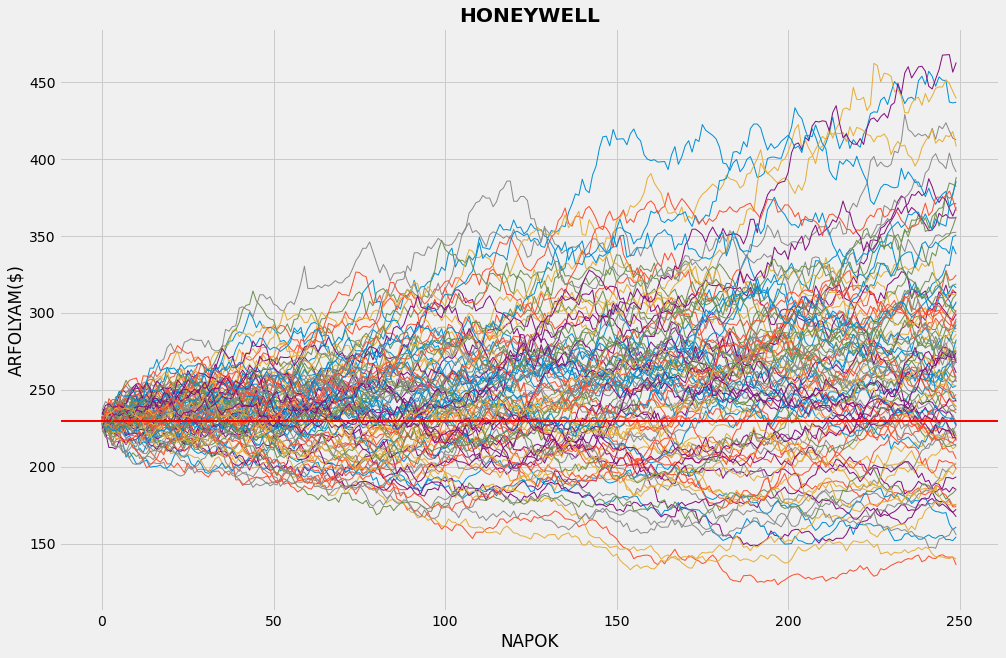

In [15]:
#Honeywell:
n = 100
days = 250 #1 ev

hon_mu = returns['HON'].mean()
hon_sigma = returns['HON'].std()

hon_last_price = dataframe['HON'].iloc[-1]

plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("HONEYWELL", fontweight='bold')

for i in range(n):
    hon_sim_returns = np.random.normal(hon_mu, hon_sigma, days)
    hon_sim_prices = hon_last_price * (hon_sim_returns + 1).cumprod()
    plt.axhline(hon_last_price, color="red", lw=2)
    plt.plot(hon_sim_prices, lw=1)
    
plt.show()

> # <span style="font-family: JetBrains Mono; color: SteelBlue">1 DOLLAR MA HANY DOLLAR</span>

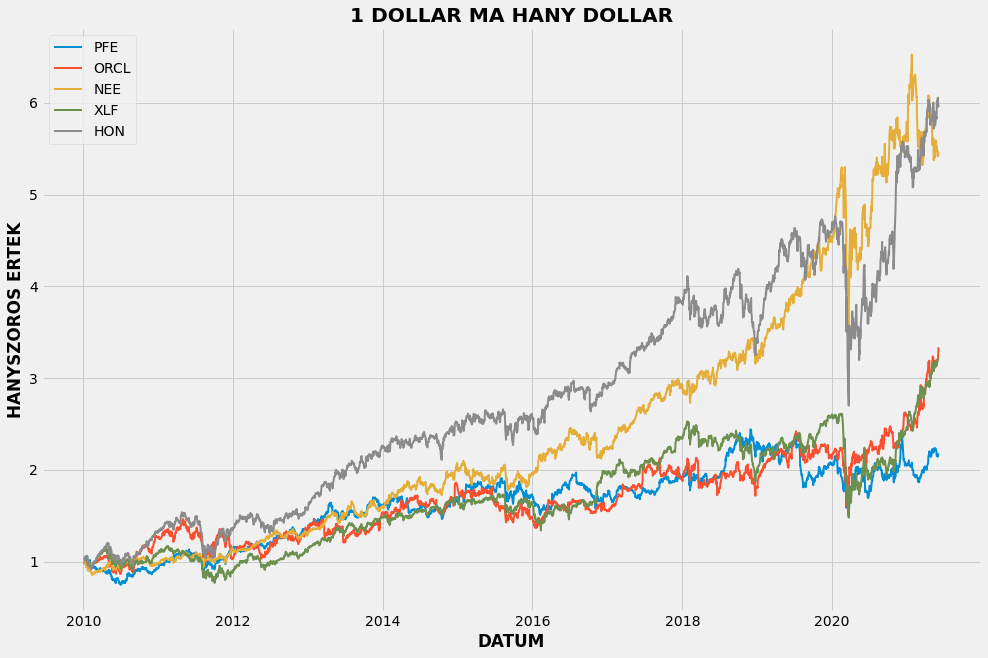

PFE: 2.18
ORCL: 3.34
NEE: 5.43
XLF: 3.22
HON: 5.98


In [16]:
plt.figure(figsize=(15,10))
cum_returns = (1 + returns).cumprod()

plt.plot(cum_returns, lw=2)
plt.legend(returns.columns)

plt.xlabel('DATUM', fontweight='bold')
plt.ylabel('HANYSZOROS ERTEK', fontweight='bold')
plt.title('1 DOLLAR MA HANY DOLLAR', fontweight='bold')
plt.show()

print('PFE: {:.2f}'.format(cum_returns.tail(1).iloc[0,0]))
print('ORCL: {:.2f}'.format(cum_returns.tail(1).iloc[0,1]))
print('NEE: {:.2f}'.format(cum_returns.tail(1).iloc[0,2]))
print('XLF: {:.2f}'.format(cum_returns.tail(1).iloc[0,3]))
print('HON: {:.2f}'.format(cum_returns.tail(1).iloc[0,4]))
